In [2]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.preprocessing import MinMaxScaler


In [3]:
donors=pd.read_csv(r"C:\Users\marta\Documents\Big data\NOVA IMS\20202021\1st Semester\Data Mining\Project\donors.csv",index_col = 0)

C:\Users\marta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
donors.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,...,7.741935,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,,,NaN,0,,...,7.481481,15078,1,L,4,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,,...,6.812500,172556,1,L,4,E,X,X,X,C
4,2006-01-01,,0,FL,33176,,,1940-01-01,0,X,...,6.864865,7112,1,L,2,F,X,X,X,A


In [5]:
donors.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 0 to 95411
Data columns (total 475 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ODATEDW   95412 non-null  object 
 1   OSOURCE   95412 non-null  object 
 2   TCODE     95412 non-null  int64  
 3   STATE     95412 non-null  object 
 4   ZIP       95412 non-null  object 
 5   MAILCODE  95412 non-null  object 
 6   PVASTATE  95412 non-null  object 
 7   DOB       71529 non-null  object 
 8   NOEXCH    95412 non-null  object 
 9   RECINHSE  95412 non-null  object 
 10  RECP3     95412 non-null  object 
 11  RECPGVG   95412 non-null  object 
 12  RECSWEEP  95412 non-null  object 
 13  MDMAUD    95412 non-null  object 
 14  DOMAIN    95412 non-null  object 
 15  HOMEOWNR  95412 non-null  object 
 16  CHILD03   95412 non-null  object 
 17  CHILD07   95412 non-null  object 
 18  CHILD12   95412 non-null  object 
 19  CHILD18   95412 non-null  object 
 20  NUMCHLD   12386 non-null  f

In [6]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 0 to 95411
Columns: 475 entries, ODATEDW to GEOCODE2
dtypes: float64(49), int64(301), object(125)
memory usage: 346.5+ MB


In [7]:
donors.dtypes

ODATEDW     object
OSOURCE     object
TCODE        int64
STATE       object
ZIP         object
             ...  
RFA_2A      object
MDMAUD_R    object
MDMAUD_F    object
MDMAUD_A    object
GEOCODE2    object
Length: 475, dtype: object

In [8]:
donors.isna().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2    132
Length: 475, dtype: int64

In [9]:
donors.duplicated().sum()

0

In [10]:
donors.describe(include="all")

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412,95412,95412.000000,95412,95412,95412,95412,71529,95412,95412,...,95412.000000,95412.000000,95412.000000,95412,95412.000000,95412,95412,95412,95412,95280
unique,54,896,NaN,57,19938,2,3,847,6,2,...,NaN,NaN,NaN,1,NaN,4,5,4,5,5
top,2015-01-01,MBC,NaN,CA,85351,,,1968-01-01,0,,...,NaN,NaN,NaN,L,NaN,F,X,X,X,A
freq,15358,4539,NaN,17343,61,94013,93954,1479,61203,88709,...,NaN,NaN,NaN,95412,NaN,46964,95118,95118,95118,34484
mean,NaN,NaN,54.223117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.347786,95778.176959,0.500618,NaN,1.910053,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,953.844476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.769997,55284.596094,0.500002,NaN,1.072749,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.285714,1.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.384615,47910.750000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.636364,95681.500000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.477955,143643.500000,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


In [11]:
donors.copy()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,...,7.741935,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,,,NaN,0,,...,7.481481,15078,1,L,4,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,,...,6.812500,172556,1,L,4,E,X,X,X,C
4,2006-01-01,,0,FL,33176,,,1940-01-01,0,X,...,6.864865,7112,1,L,2,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,1,AK,99504,,,NaN,0,,...,25.000000,184568,0,L,1,G,X,X,X,C
95408,2016-01-01,DCD,1,TX,77379,,,1970-01-01,0,,...,20.000000,122706,1,L,1,F,X,X,X,A
95409,2015-01-01,MBC,1,MI,48910,,,1958-01-01,0,,...,8.285714,189641,1,L,3,E,X,X,X,B
95410,2006-01-01,PRV,0,CA,91320,,,1960-05-01,0,X,...,12.146341,4693,1,L,4,F,X,X,X,A


In [12]:
conda activate MiningProject


Note: you may need to restart the kernel to use updated packages.


In [13]:
conda env export > MiningProject.yml


Note: you may need to restart the kernel to use updated packages.


In [14]:
my_project = donors.copy()
my_project

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,...,7.741935,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,,,NaN,0,,...,7.481481,15078,1,L,4,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,,...,6.812500,172556,1,L,4,E,X,X,X,C
4,2006-01-01,,0,FL,33176,,,1940-01-01,0,X,...,6.864865,7112,1,L,2,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,1,AK,99504,,,NaN,0,,...,25.000000,184568,0,L,1,G,X,X,X,C
95408,2016-01-01,DCD,1,TX,77379,,,1970-01-01,0,,...,20.000000,122706,1,L,1,F,X,X,X,A
95409,2015-01-01,MBC,1,MI,48910,,,1958-01-01,0,,...,8.285714,189641,1,L,3,E,X,X,X,B
95410,2006-01-01,PRV,0,CA,91320,,,1960-05-01,0,X,...,12.146341,4693,1,L,4,F,X,X,X,A


In [15]:
#This will be like ordinal encoding
#The following line of code will substitute the letters under the column CHILD03 by the correspondent numbers
my_project.replace({"CHILD03": {"B":2,"M":1,"F": 1," ":0}}, inplace=True)



In [16]:
my_project["CHILD03"].unique()

array([0, 1, 2], dtype=int64)

In [17]:
#The following line of code will substitute the letters under the column CHILD07 by the correspondent numbers
my_project.replace({"CHILD07": {"B":2,"M":1,"F": 1," ":0}}, inplace=True)

In [18]:
my_project["CHILD07"].unique()

array([0, 1, 2], dtype=int64)

In [19]:
#The following line of code will substitute the letters under the column CHILD12 by the correspondent numbers
my_project.replace({"CHILD12": {"B":2,"M":1,"F": 1," ":0}}, inplace=True)

In [20]:
my_project["CHILD12"].unique()

array([0, 1, 2], dtype=int64)

In [21]:
#The following line of code will substitute the letters under the column CHILD18 by the correspondent numbers
my_project.replace({"CHILD18": {"B":2,"M":1,"F": 1," ":0}}, inplace=True)

In [22]:
my_project["CHILD18"].unique()

array([0, 1, 2], dtype=int64)

In [23]:
my_project["CHILD18"].dtypes

dtype('int64')

In [180]:
my_project["NUMCHLD"].dtypes

dtype('float64')

In [24]:
my_project["number_child"]=my_project[["CHILD03","CHILD07","CHILD12","CHILD18"]].sum(axis=1)
my_project["number_child"].unique()
#In comparison with the column numchild this have less unique values because the latter have 6 and 7 values too, which together correspond to 8 donors.

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [184]:
#my_project["number_child"]=my_project[["CHILD03","CHILD07","CHILD12","CHILD18"]].sum(axis=1)
#my_project["NUMCHLD "].value_counts()
my_project[my_project['NUMCHLD'] == 7.0]['number_child']
my_project [my_project['NUMCHLD'] == 6.0]['number_child']
#In comparison with the column numchild this have less unique values because the latter have 6 and 7 values too, which together correspond to 8 donors.

12687    0
37107    3
52817    4
55505    1
55714    2
84553    0
94244    3
Name: number_child, dtype: int64

In [190]:
#This line of code will tell us the percentage of columns that remained the same between NUMCHLD and number_child
compare_numchild_number_child = np.where(my_project["NUMCHLD"] == my_project["number_child"], True, False)
np.sum(compare_numchild_number_child *1)/len(my_project)

0.8805391355385067

In [25]:
#This line of code will tell us the number of donors without children after our feature engineering
my_project["number_child"].isin(['0']).sum(axis=0)


89528

In [193]:
#The following line of code tell us that in 84014 rows there is no difference between NUMCHILD and nuumber_child
diff = my_project['NUMCHLD'] - my_project['number_child']
diff.value_counts()

 0.0    84014
 1.0     6438
 2.0     2147
-1.0     1606
 3.0      620
-2.0      307
 4.0      173
-3.0       60
 5.0       33
-4.0       10
 6.0        2
-5.0        2
dtype: int64

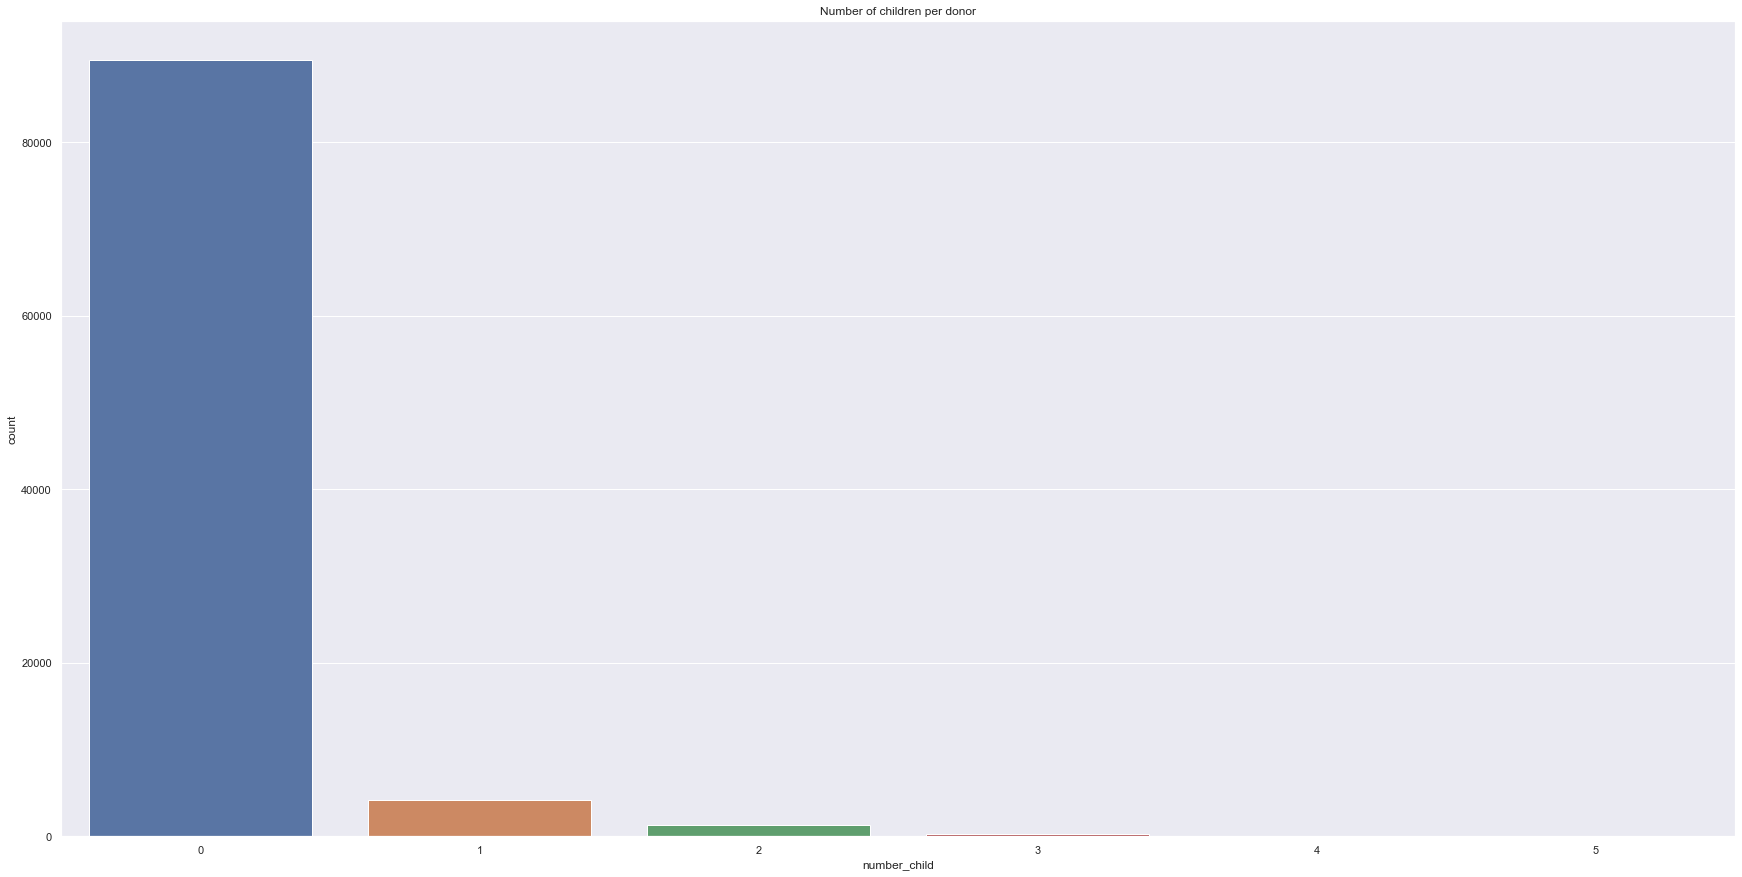

In [26]:
#Make a graph of the differences
sns.set() 
plt.figure(figsize=(30,15))

sns.countplot(x=my_project["number_child"])
plt.title("Number of children per donor")

plt.show()

C:\Users\marta\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\marta\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


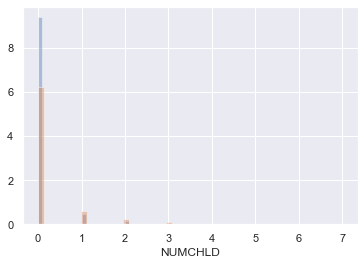

In [202]:
sns.distplot(my_project["number_child"])
sns.distplot(my_project["NUMCHLD"])
pl
plt.show()



In [27]:
#This is the number of missing values in NUMCHLD which can be considered like zeros because this value doesn't exist under this column
my_project["NUMCHLD"].isin([None]).sum(axis=0)
#Even though this number is lower than the one under number_child we will still opt for the number_child variable, because NUMCHLD is a numerical variable and there was no zero value what we consider very strange. In conclusion, we consider that is better to include the column that resulted from feature engineering, column number_child.

83026

In [28]:
my_project.replace({"NUMCHLD":{None:0}}, inplace=True)

In [29]:
my_project["NUMCHLD"].unique()

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [30]:
my_project["NUMCHLD"].dtypes

dtype('float64')

In [31]:
my_project.astype({'NUMCHLD': 'int32'})["NUMCHLD"].dtypes

dtype('int32')

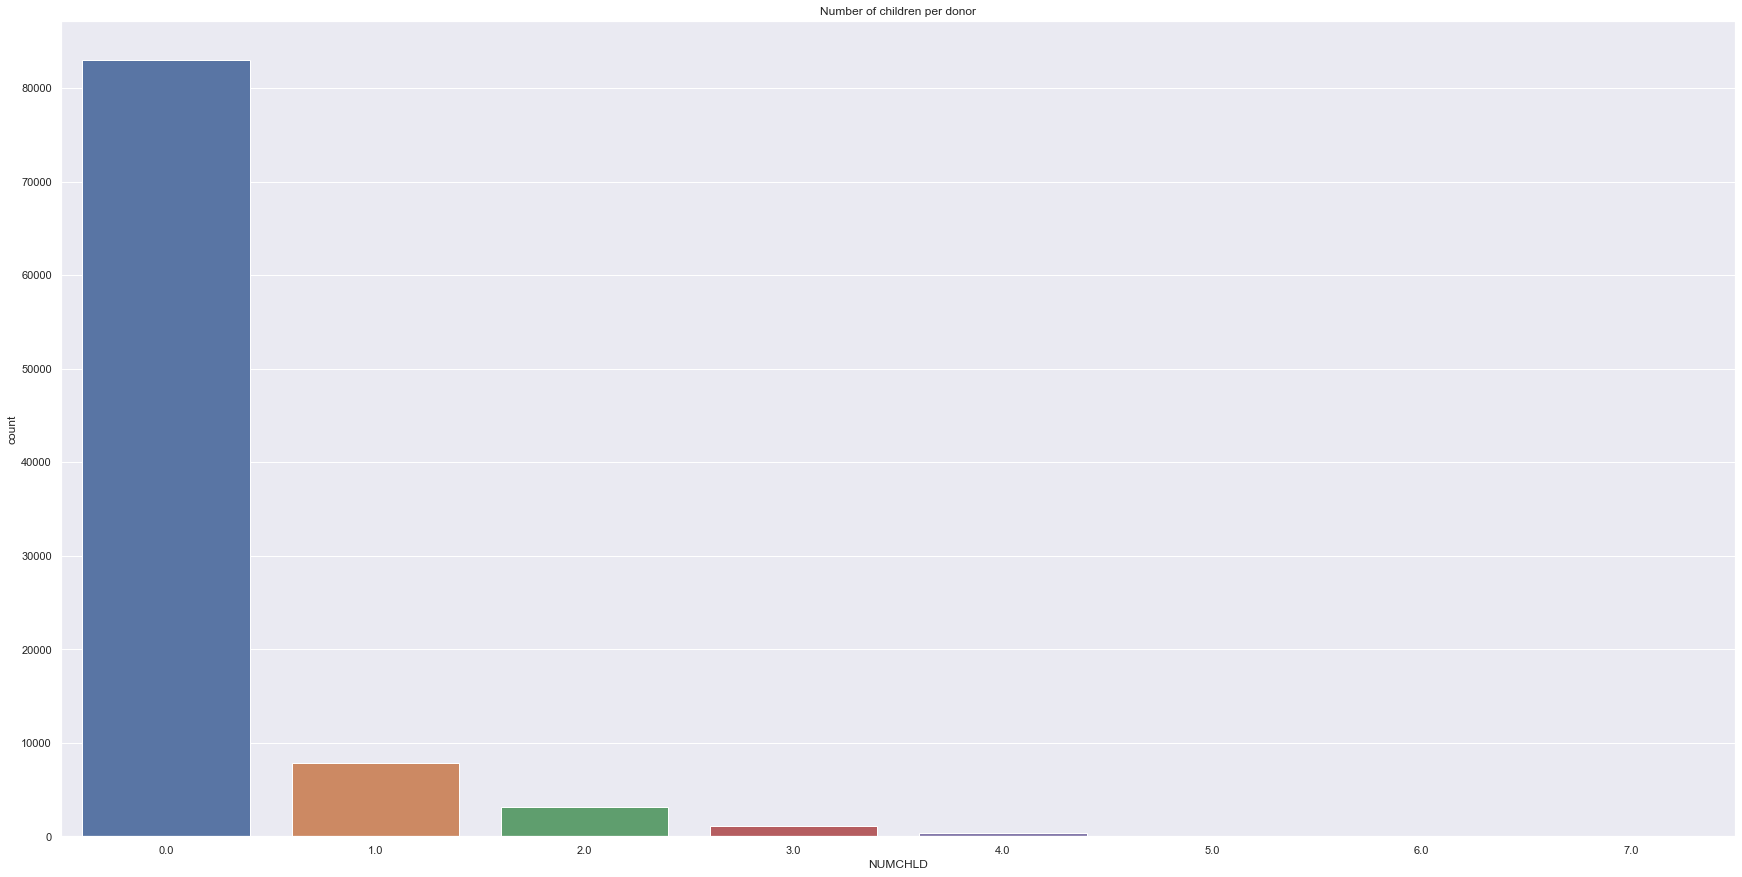

In [32]:
sns.set() 
plt.figure(figsize=(30,15))

sns.countplot(x=my_project["NUMCHLD"])
plt.title("Number of children per donor")

plt.show()

In [33]:
#my_project.drop(["NUMCHLD"],axis=1,inplace=True)

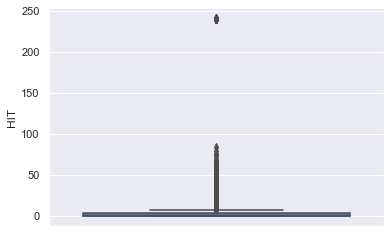

<Figure size 2160x1080 with 0 Axes>

In [34]:
#Variable HIT
sns.boxplot(y=my_project["HIT"])
plt.figure(figsize=(30,15))

plt.show()

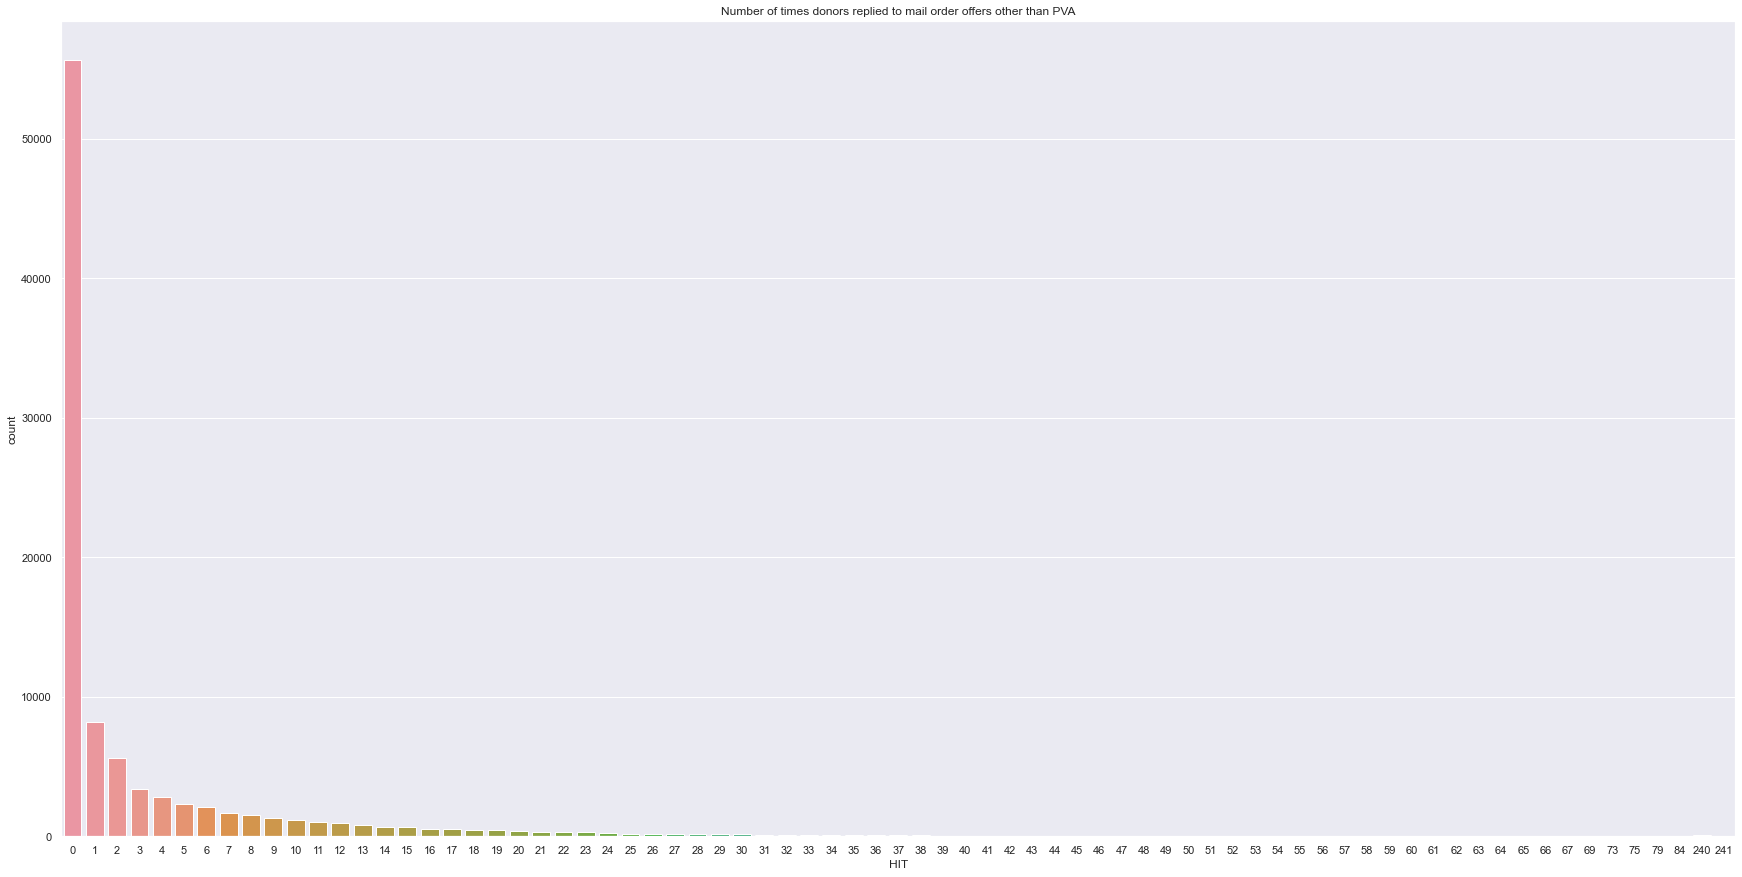

In [35]:
#Varaible HIT
sns.set() 
plt.figure(figsize=(30,15))

sns.countplot(x=my_project["HIT"])
plt.title("Number of times donors replied to mail order offers other than PVA")

plt.show()
#The hits of 32 to 241 qccount for only 1018 donors

In [36]:
#To detect outliers manually by limiting the number of replies to 31 ( we will keep this)
filters1 = ((my_project["HIT"]<=31))

my_project_noutliers = my_project[filters1]


In [37]:
#How much data is kept if we limit the number of replies to 31
print('Percentage of data kept after removing outliers:', np.round(my_project_noutliers.shape[0] / my_project.shape[0], 4))

Percentage of data kept after removing outliers: 0.9893


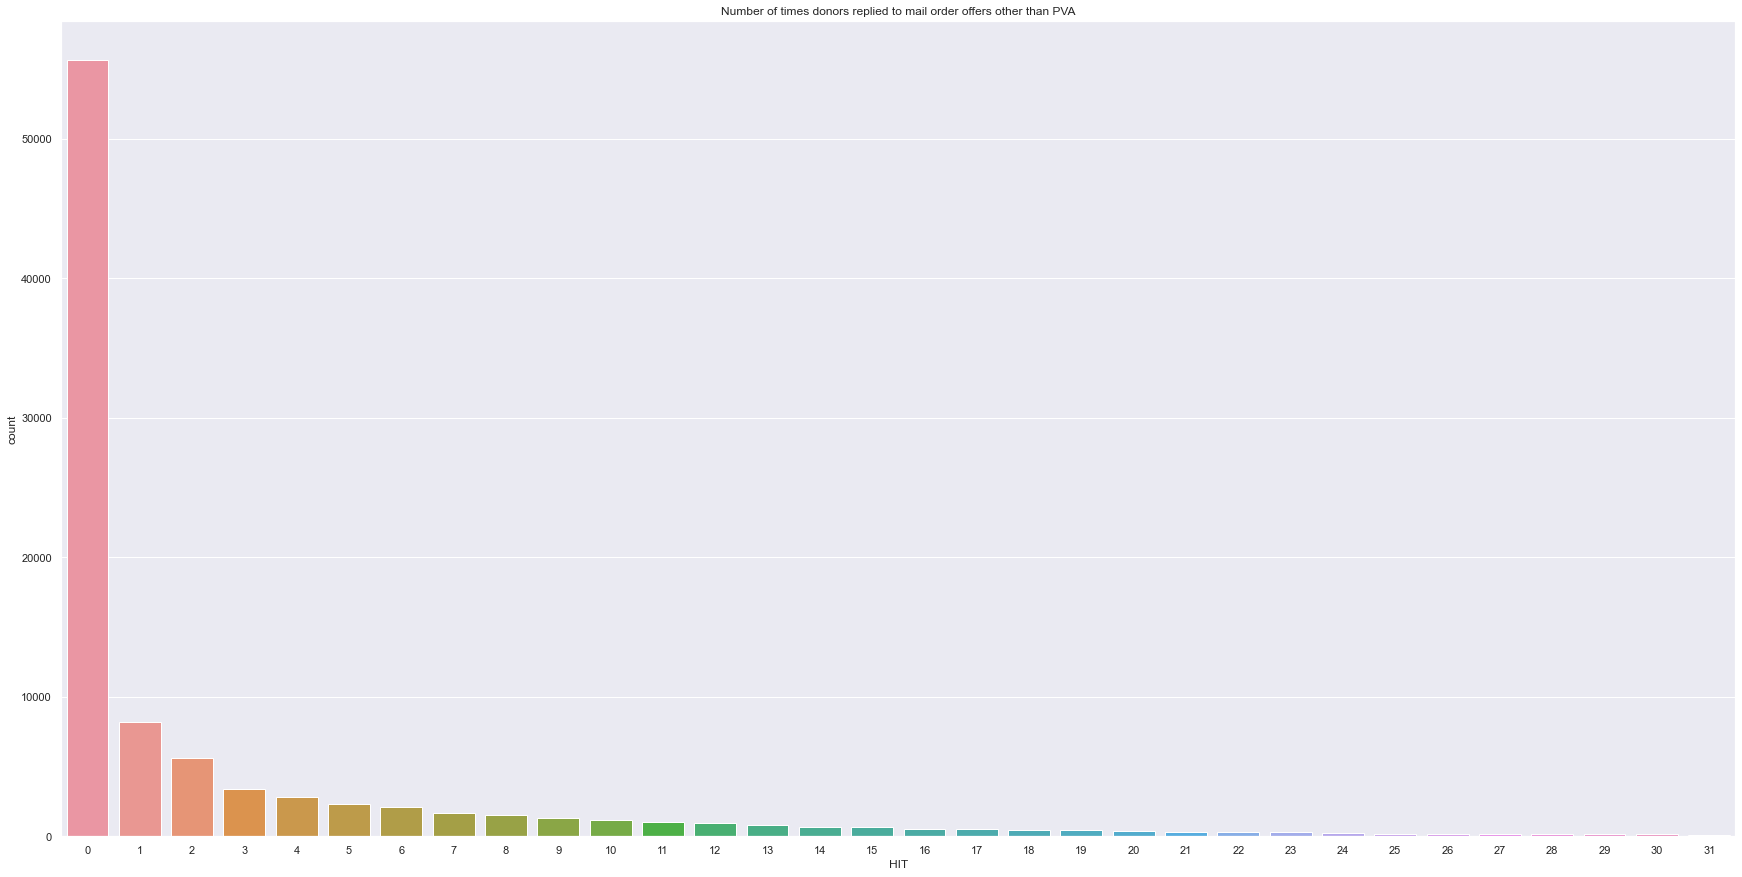

In [38]:
sns.set() 
plt.figure(figsize=(30,15))

sns.countplot(x=my_project_noutliers["HIT"])
plt.title("Number of times donors replied to mail order offers other than PVA")

plt.show()

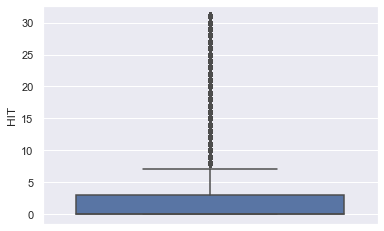

<Figure size 2160x1080 with 0 Axes>

In [39]:
#Variable HIT considering only nuumber of replies until 31
sns.boxplot(y=my_project_noutliers["HIT"])
plt.figure(figsize=(30,15))

plt.show()

In [40]:
#To detect outliers manually by limiting the number of replies to 84
filters2 = ((my_project["HIT"]<=84))
my_project_f2 = my_project[filters2]


In [41]:
#How much data is kept if we limit the number of replies to 84
print('Percentage of data kept after removing outliers:', np.round(my_project_f2.shape[0] / my_project.shape[0], 4))

Percentage of data kept after removing outliers: 0.9992


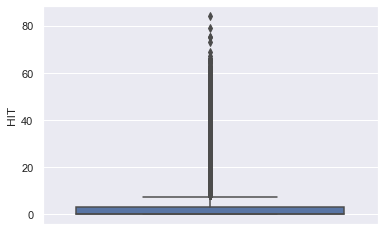

<Figure size 2160x1080 with 0 Axes>

In [42]:
#Variable HIT  with replies until 84
sns.boxplot(y=my_project_f2["HIT"])
plt.figure(figsize=(30,15))

plt.show()

In [43]:
#Assessment of outliers with interquartile range
q25 = my_project[["HIT"]].quantile(.25)
q75 = my_project[["HIT"]].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters3 = []
for metric in my_project[["HIT"]]:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters3.append(my_project["HIT"].between(llim, ulim, inclusive=True))

filters3 = pd.Series(np.all(filters3, 0))
my_project_f3 = my_project[filters3]
print('Percentage of data kept after removing outliers:', np.round(my_project_f3.shape[0] / my_project.shape[0], 4))

Percentage of data kept after removing outliers: 0.8571


In [197]:
#The upper limit
upper_lim


HIT    7.5
dtype: float64

In [44]:
#If we combine the two methods, not interesting

my_project_f4 = my_project[(filters1 | filters3)]
print('Percentage of data kept after removing outliers:', np.round(my_project_f4.shape[0] / my_project.shape[0], 4))

Percentage of data kept after removing outliers: 0.9893


In [88]:
my_project2=donors.copy()
#Will tranform the variaable RECP3 in string
my_project2["RECP3"].astype(str)

0         
1         
2         
3         
4        X
        ..
95407     
95408     
95409    X
95410     
95411     
Name: RECP3, Length: 95412, dtype: object

In [92]:
#Variable SOLP3

#RECP3                       P3 File Flag
#                            _ = Not a P3 Record
#                            X = Donor has given to PVA's P3 program
#SOLP3                       SOLICIT LIMITATION CODE P3
#                               = can be mailed (Default)
#                            00 = Do Not Solicit or Mail
#                            01 = one solicitation per year
#                           02 = two solicitations per year
#                            03 = three solicitations per year
#                            04 = four solicitations per year
#                            05 = five solicitations per year
#                            06 = six solicitations per year
#                            12 = twelve solicitations per year

#The following line of code will let us know what number of elements under column SOLP3 have a correspondent blank value under RECP3, meaning they represent donors who are not in P3 program.
my_project2[["RECP3","SOLP3"]].groupby(by=["RECP3"]).count()


,SOLP3
RECP3,
,93395
X,2017


In [71]:
#The following line will tell us the number of blank cells under SOLP3 which can account for missing values,donors who can be mailed as many times as we want or not member of P3 program. .
my_project2["SOLP3"].isin([" "]).sum(axis=0)

95232

In [129]:
#The following line of code will give the index of the donors who don't belong to P3 program because they have a blank value under RECP3

grouped= my_project2[["RECP3","SOLP3"]].groupby(by=["RECP3"]).get_group(" ").index


In [130]:
#The following line of code will transform the values under the column SOLP3  correspondent to the above axis in -1
solp31=my_project2.iloc[grouped,47].replace(" ",-1)

In [131]:
#The following line of code will give the index of the donors who  belong to P3 program because they have a X under RECP3
grouped1=my_project[["RECP3","SOLP3"]] .groupby(by=["RECP3"]).get_group("X").index

In [132]:
#The following line of code will transform the donors under SOLP3 correspondent to the above axis and assume that they can be mailed as many times as we want to the number 12

solp32=my_project2.iloc[grouped1,47].replace(" ",12)

In [133]:
#This line of code will return the column SOLP3 with the necessary changes
my_project2["SOLP3"]=pd.concat([solp31,solp32])

In [135]:
my_project2["SOLP3"].unique()

array([-1, 12, '00', '12', '01', '02'], dtype=object)

In [144]:
my_project2["SOLP3"].isnull().sum()

0

In [147]:
my_project2["SOLP3"].astype(int)

0        -1
1        -1
2        -1
3        -1
4        12
         ..
95407    -1
95408    -1
95409    12
95410    -1
95411    -1
Name: SOLP3, Length: 95412, dtype: int32

In [148]:
my_project2["SOLP3"].unique()

array([-1, 12, '00', '12', '01', '02'], dtype=object)

In [151]:
my_project2.replace({"SOLP3": {"00":0,"12":12,"01": 1,"02":2}}, inplace=True)

In [152]:
my_project2["SOLP3"].unique()

array([-1, 12,  0,  1,  2], dtype=int64)

In [198]:
my_project2.drop(["RECP3"], axis=1,inplace=True)

In [ ]:
#Variable SOLIH
#SOLICITATION LIMIT CODE IN HOUSE
#                               = can be mailed (Default)
#                            00 = Do Not Solicit
#                            01 = one solicitation per year
#                            02 = two solicitations per year
#                            03 = three solicitations per year
#                            04 = four solicitations per year
#                            05 = five solicitations per year
#                            06 = six solicitations per year
#                            12 = twelve solicitations per year
#RECINHSE                    In House File Flag
#                            _ = Not an In House Record
#                            X = Donor has given to PVA's In House program

In [169]:
#The following line of code will let us know what number of elements under column SOLIH have a correspondent blank value under RECINHSE, meaning they represent donors who are not inHouse program.
my_project2[["RECINHSE","SOLIH"]].groupby(by=["RECINHSE"]).count()

,SOLIH
RECINHSE,
,88709
X,6703


In [137]:
#The following line of code will give the index of the donors who don't belong to In House  program because they have a blank value under RECINHSE

SOLIHg_index1= my_project2[["RECINHSE","SOLIH"]].groupby(by=["RECINHSE"]).get_group(" ").index

In [138]:
#The following line of code will transform the donors who don't belong to In House program under SOLIH in -1.
SOLIH1=my_project2.iloc[grouped,48].replace(" ",-1)

In [207]:
SOLIH1better=my_project2.iloc[grouped]["SOLIH"].replace(" ",-1)
SOLIH1better

0        -1
1        -1
2        -1
3        -1
5        -1
         ..
95406    -1
95407    -1
95408    -1
95410    12
95411    12
Name: SOLIH, Length: 93395, dtype: int64

In [170]:
#The following line of code will give the index of the donors who  belong to In House program because they have a X under RECINHSE
SOLIHg_index2=my_project[["RECINHSE","SOLIH"]] .groupby(by=["RECINHSE"]).get_group("X").index

In [209]:
#The following line of code will transform the donors under SOLIH" correspondent to the above axis and assume that they can be mailed as many times as we want to the number 12
SOLIH2=my_project2.iloc[grouped1,48].replace(" ",12)

In [208]:
#This line of code will return the column SOLIH with the necessary changes
my_project2["SOLIH"]=pd.concat([SOLIH1better,SOLIH2])

In [142]:
my_project2["SOLIH"].unique()

array([-1, 12, '12', '00', '02', '01', '04', '06', '03'], dtype=object)

In [173]:
my_project2["SOLIH"].isnull().sum()

0

In [174]:
my_project2.replace({"SOLIH": {"00":0,"12":12,"01":1,"02":2,"03":3,"04":4,"06":6}}, inplace=True)

In [175]:
my_project2["SOLIH"].unique()

array([-1, 12,  0,  2,  1,  4,  6,  3], dtype=int64)

In [ ]:
#We can conclude to eliminate RECINHSE and RECP3
#my_project.drop(["RECINHSE","RECP3"],axis=1,inplace=True)

In [168]:
#Major ($$) Donor Flag
 #                           _ = Not a Major Donor
 #                           X = Major Donor
#'X' indicates that the donor is not a major donor in MDMAUD
my_project2.loc[my_project2["MAJOR"] ==" "][["MDMAUD"]] ["MDMAUD"].value_counts()
#We can conclude that all blank values under column Major (that represent the not major donor) have a correspondent X in the column MDMAUD, so the column Major can be deleted  

XXXX    95118
Name: MDMAUD, dtype: int64

In [ ]:
#my_project2.drop("MAJOR",axis=1, inplace=True)
